# SMU DataArts DS Task 
Candidate: Marissa McKee

March 2022

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data
#### Description
COVID testing data provided by Johns Hopkins University to analyze cumulative COVID testing counts in New York state. 

#### Task
- Access the JSON data that lives at this URL API call: https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json
- Format the data into a dataframe (Python/R) to manipulate it for the following steps.

In [2]:
# Call the COVID testing data API filtered for New York data
response = requests.get('https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json')
print(response.status_code) # 200 success

200


In [3]:
# Parse json format and convert to pandas dataframe
data = response.text
parse_json = json.loads(data)
df = pd.DataFrame(parse_json)
df.head()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN


## 2. Data Exploration
Gather some basic information about the data that could include things like, number of observations, feature names, data types, memory usage, etc. Whatever you think helps someone understand the data at a high level.

In [4]:
df.shape # 36,628 records, 14 features

(36628, 14)

In [5]:
df.columns # column names

Index(['date', 'state', 'people_viral_positive', 'tests_viral_positive',
       'tests_viral_negative', 'encounters_viral_total', 'tests_viral_total',
       'people_viral_total', 'tests_combined_total', 'cases_conf_probable',
       'people_antigen_positive', 'people_antigen_total', 'cases_confirmed',
       'cases_probable'],
      dtype='object')

<b>Data Quality Check</b>

- The data has several columns that are missing values. 
- The data consists of 14 variables - 12 variables have a float data type, 1 variable has an int data type, and 1 variable contains string values
- Memory usage 3.9 MB

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36628 entries, 0 to 36627
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     36628 non-null  int64  
 1   state                    36628 non-null  object 
 2   people_viral_positive    33176 non-null  float64
 3   tests_viral_positive     17036 non-null  float64
 4   tests_viral_negative     10165 non-null  float64
 5   encounters_viral_total   9188 non-null   float64
 6   tests_viral_total        27846 non-null  float64
 7   people_viral_total       16198 non-null  float64
 8   tests_combined_total     36417 non-null  float64
 9   cases_conf_probable      36321 non-null  float64
 10  people_antigen_positive  1482 non-null   float64
 11  people_antigen_total     2165 non-null   float64
 12  cases_confirmed          13945 non-null  float64
 13  cases_probable           13944 non-null  float64
dtypes: float64(12), int64(

<b>Categorical Data</b>

One column has categorical state data. The states are abreviated. New York accounts for 654 records in the data.

In [7]:
cat_cols = df.loc[:,df.dtypes=='object'].columns
for column in cat_cols:
    print('Unique Values in ', column, df[column].unique())
    print(df[column].value_counts())

Unique Values in  state ['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
WA    703
MA    694
VA    689
FL    687
NJ    675
NE    670
IN    658
CT    656
MI    655
RI    655
WY    655
NY    654
TX    653
VT    653
PA    653
WI    653
IL    652
HI    652
SC    652
CA    652
AZ    652
NC    652
OR    652
GA    652
CO    652
NH    652
TN    651
MD    651
NV    651
DC    651
NM    651
OH    651
MN    650
DE    650
AR    650
AK    650
KS    650
IA    650
KY    650
WV    650
OK    649
AL    649
ME    649
UT    649
ND    649
MS    649
MO    649
MT    649
LA    649
ID    649
SD    649
PR    640
VI    640
MP    640
GU    640
AS    640
Name: state, dtype: int64


<b>Missing Values</b>
- Columns people_antigen_positive and people_antigen_total are missing 90%+ of values.
- Columns encounters_viral_total, tests_viral_negative, cases_probable, cases_confirmed, people_viral_total, tests_viral_positive are missing between 50% and 75% of values. 
- The remaining columns have less than 25% of values missing.  

Some missing data can still be used in analysis. Columns where majority of the data exists already (> 49%) can be used with an imputation technique to predict the missing values. Imputing missing values can be done in several ways:
   - Use mean/mode/median of column values to use where values are missing. While although this method is simple to explain and easy to implement, it is not as effective. 
   - Use an imputation algorithm like a random forest or K Nearest Neighbors. KNN finds missing values closest neighbors and imputes based on the surrounding data points. KNN and RF are computationally heavy but time and computation power can be afforded in this case since the dataset is small.
   
Missing data can be problematic when applying machine learning models. Simpler algorithms can not handle missing values. It's important to handle missing data effectively. 

The sum of the missing values per variable are visualized below.

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.head()
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(30)

,column_name,percent_missing
people_antigen_positive,people_antigen_positive,95.953915
people_antigen_total,people_antigen_total,94.089221
encounters_viral_total,encounters_viral_total,74.915365
tests_viral_negative,tests_viral_negative,72.248007
cases_probable,cases_probable,61.930763
cases_confirmed,cases_confirmed,61.928033
people_viral_total,people_viral_total,55.777001
tests_viral_positive,tests_viral_positive,53.489134
tests_viral_total,tests_viral_total,23.976193
people_viral_positive,people_viral_positive,9.424484


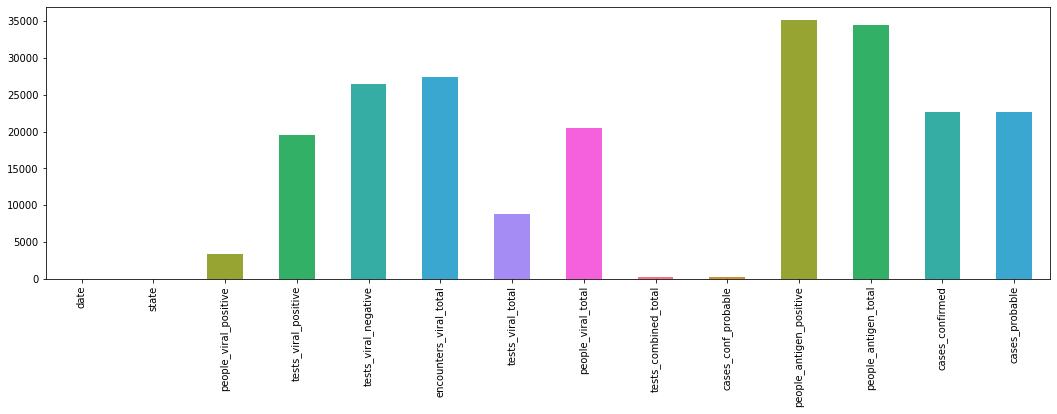

In [9]:
plt.figure(figsize = (18,5))
df.isnull().sum().plot(kind='bar',color=sns.color_palette("husl", 8))

<b>Descriptive Statistics</b>
- On average 4,318,515 tests are positive, 3,790,848 people test positive, and 3,823,510 tests are negative 

In [10]:
df.describe()

,date,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
count,3.662800e+04,3.317600e+04,1.703600e+04,1.016500e+04,9.188000e+03,2.784600e+04,1.619800e+04,3.641700e+04,3.632100e+04,1482.000000,2.165000e+03,1.394500e+04,13944.000000
mean,2.020604e+07,3.790848e+05,4.318515e+05,3.823510e+06,6.631937e+06,5.432242e+06,1.737529e+06,5.424406e+06,3.855561e+05,64240.545884,4.129541e+05,6.252463e+05,66616.499211
std,4.937226e+03,6.275464e+05,6.738457e+05,5.487488e+06,1.172307e+07,1.029309e+07,2.338632e+06,1.068108e+07,6.468026e+05,44312.597177,3.156144e+05,7.974845e+05,103680.975507
min,2.020011e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000,3.000000e+00,0.000000e+00,0.000000
25%,2.020081e+07,3.309925e+04,4.580800e+04,8.012060e+05,6.925688e+05,4.839052e+05,2.565612e+05,3.765340e+05,2.102200e+04,27752.750000,1.602910e+05,1.281000e+05,0.000000
50%,2.021012e+07,1.460960e+05,1.924800e+05,2.473541e+06,2.497510e+06,2.206154e+06,8.164770e+05,1.845335e+06,1.352330e+05,65291.500000,3.557740e+05,4.001880e+05,17282.000000
75%,2.021070e+07,4.712642e+05,5.724602e+05,4.521318e+06,7.862398e+06,5.769762e+06,2.332996e+06,6.034682e+06,4.790360e+05,88501.250000,5.851890e+05,7.590620e+05,106439.000000
max,2.021122e+07,4.896401e+06,4.393776e+06,4.024120e+07,8.388496e+07,1.157405e+08,1.337491e+07,1.157405e+08,4.896401e+06,170373.000000,1.305786e+06,4.896401e+06,749056.000000


<b>Correlation</b>

The correlation plot below shows strong positive correlations with majority of the individual variables. The plot below suggests there is multicollinearity. Multicollinearity can cause issues in some machine learning models. Multicollinearity among independent variables will result in less reliable statistical inferences. The existence of multicollinearity in a data set can lead to less reliable results due to larger standard errors.  

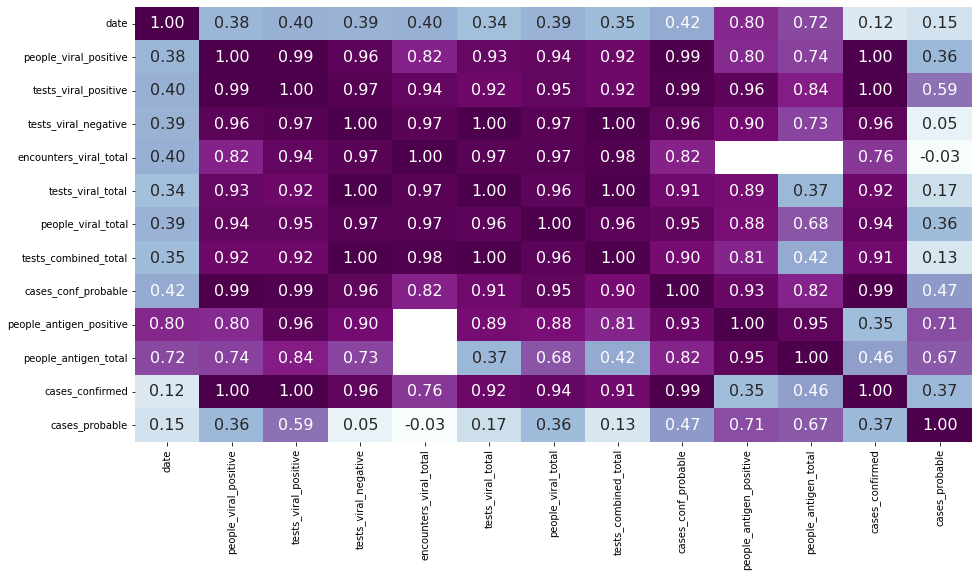

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
           cmap='BuPu',
           annot=True,
           fmt=".2f",
           annot_kws={'size':16},
           cbar=False)

<b>Histogram and Density Plots</b>

The distribution of data suggests the data is skewed to the right. When data are skewed right, the mean is larger than the median. The histogram and density plot display a pareto distribution. 

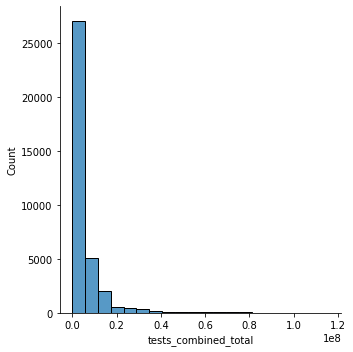

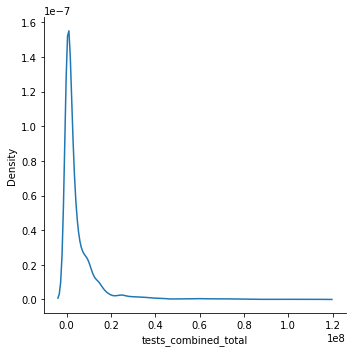

In [12]:
sns.displot(df, x="tests_combined_total", bins=20)
sns.displot(df, x="tests_combined_total", kind="kde")

<b>Box Plots</b>

The variables tests_viral_total, tests_combined_total, encounters_viral_total have many outliers and a wider spread of data.

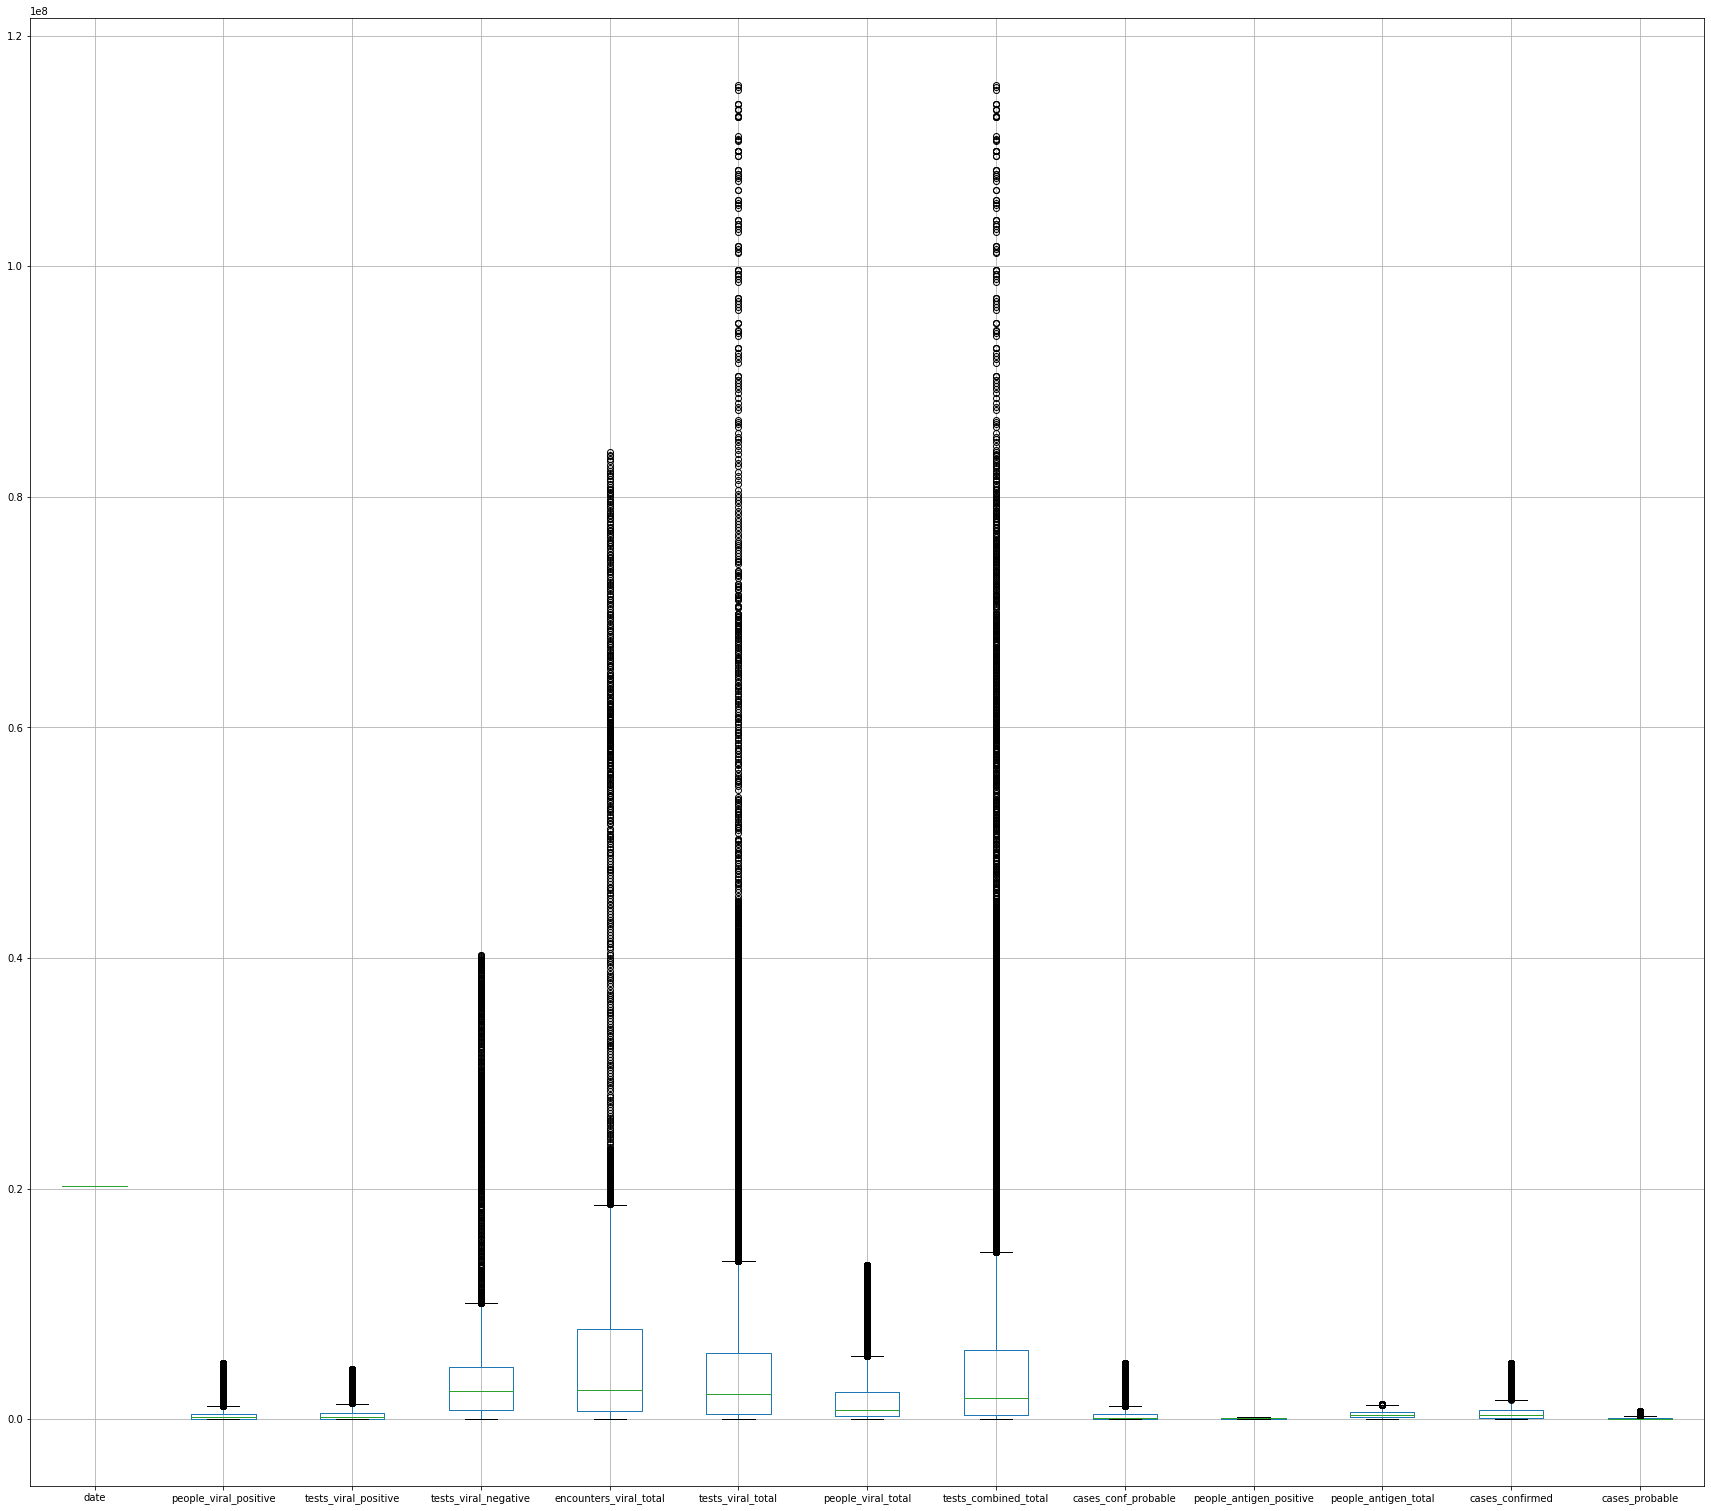

In [13]:
plt.figure(figsize=(30,27))
boxplot = df.boxplot()  

Find the average for the variable tests_combined_total for the population

In [14]:
print('Average Total Combined Tests',round(df["tests_combined_total"].mean(),2))
print('Median Total Combined Tests ',round(df["tests_combined_total"].median(),2))

Average Total Combined Tests 5424406.35
Median Total Combined Tests  1845335.0


## 3. Data Preparation: New York
Manipulate the data to only look at data for New York state. Save the NY data to a CSV. Gather some basic info about the NY data.


In [15]:
options = ['NY']
  
# Select NY rows
ny_df = df[df['state'].isin(options)]
ny_df.to_csv("NY_data.csv", index=False)
ny_df.head()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
22327,20200302,NY,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
22328,20200303,NY,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
22329,20200304,NY,1.0,NaN,NaN,10.0,NaN,NaN,10.0,1.0,NaN,NaN,NaN,NaN
22330,20200305,NY,3.0,NaN,NaN,30.0,NaN,NaN,30.0,3.0,NaN,NaN,NaN,NaN
22331,20200306,NY,25.0,NaN,NaN,122.0,NaN,NaN,122.0,25.0,NaN,NaN,NaN,NaN


In [16]:
ny_df.shape # 654 records of NY data

(654, 14)

<b>NY Data Quality Check</b>

- The data has several columns that are missing a majority or all values. 
- The data consists of 14 variables - 12 variables have a float data type, 1 variable has an int data type, and 1 variable contains string values
- Memory usage 76.6 KB

In [17]:
ny_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 22327 to 36609
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     654 non-null    int64  
 1   state                    654 non-null    object 
 2   people_viral_positive    654 non-null    float64
 3   tests_viral_positive     0 non-null      float64
 4   tests_viral_negative     0 non-null      float64
 5   encounters_viral_total   654 non-null    float64
 6   tests_viral_total        0 non-null      float64
 7   people_viral_total       0 non-null      float64
 8   tests_combined_total     654 non-null    float64
 9   cases_conf_probable      654 non-null    float64
 10  people_antigen_positive  0 non-null      float64
 11  people_antigen_total     0 non-null      float64
 12  cases_confirmed          251 non-null    float64
 13  cases_probable           251 non-null    float64
dtypes: float64(12), int6

<b>NY Missing Values</b>

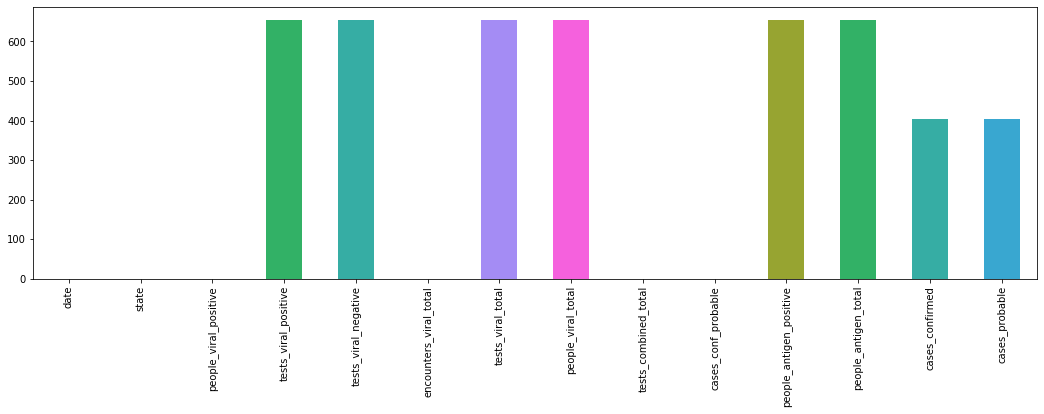

In [18]:
plt.figure(figsize = (18,5))
ny_df.isnull().sum().plot(kind='bar',color=sns.color_palette("husl", 8))

<b>NY Descriptive Statistics</b>

- On average 2,275,027 cases were confirmed and 1,292,877 were confirmed probable
- On average a total of 3,382,254 viral encounters occurred in NY

In [19]:
ny_df.describe()

,date,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
count,6.540000e+02,6.540000e+02,0.0,0.0,6.540000e+02,0.0,0.0,6.540000e+02,6.540000e+02,0.0,0.0,2.510000e+02,251.0
mean,2.020604e+07,1.292877e+06,NaN,NaN,3.382254e+07,NaN,NaN,3.382254e+07,1.292877e+06,NaN,NaN,2.275027e+06,0.0
std,4.940188e+03,8.909166e+05,NaN,NaN,2.727271e+07,NaN,NaN,2.727271e+07,8.909166e+05,NaN,NaN,2.387365e+05,0.0
min,2.020030e+07,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,1.927357e+06,0.0
25%,2.020081e+07,4.228872e+05,NaN,NaN,6.750456e+06,NaN,NaN,6.750456e+06,4.228872e+05,NaN,NaN,2.090803e+06,0.0
50%,2.021012e+07,1.307374e+06,NaN,NaN,3.016200e+07,NaN,NaN,3.016200e+07,1.307374e+06,NaN,NaN,2.175217e+06,0.0
75%,2.021070e+07,2.099584e+06,NaN,NaN,5.916881e+07,NaN,NaN,5.916881e+07,2.099584e+06,NaN,NaN,2.467766e+06,0.0
max,2.021122e+07,2.856505e+06,NaN,NaN,8.388496e+07,NaN,NaN,8.388496e+07,2.856505e+06,NaN,NaN,2.856505e+06,0.0


C:\Users\mckee\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


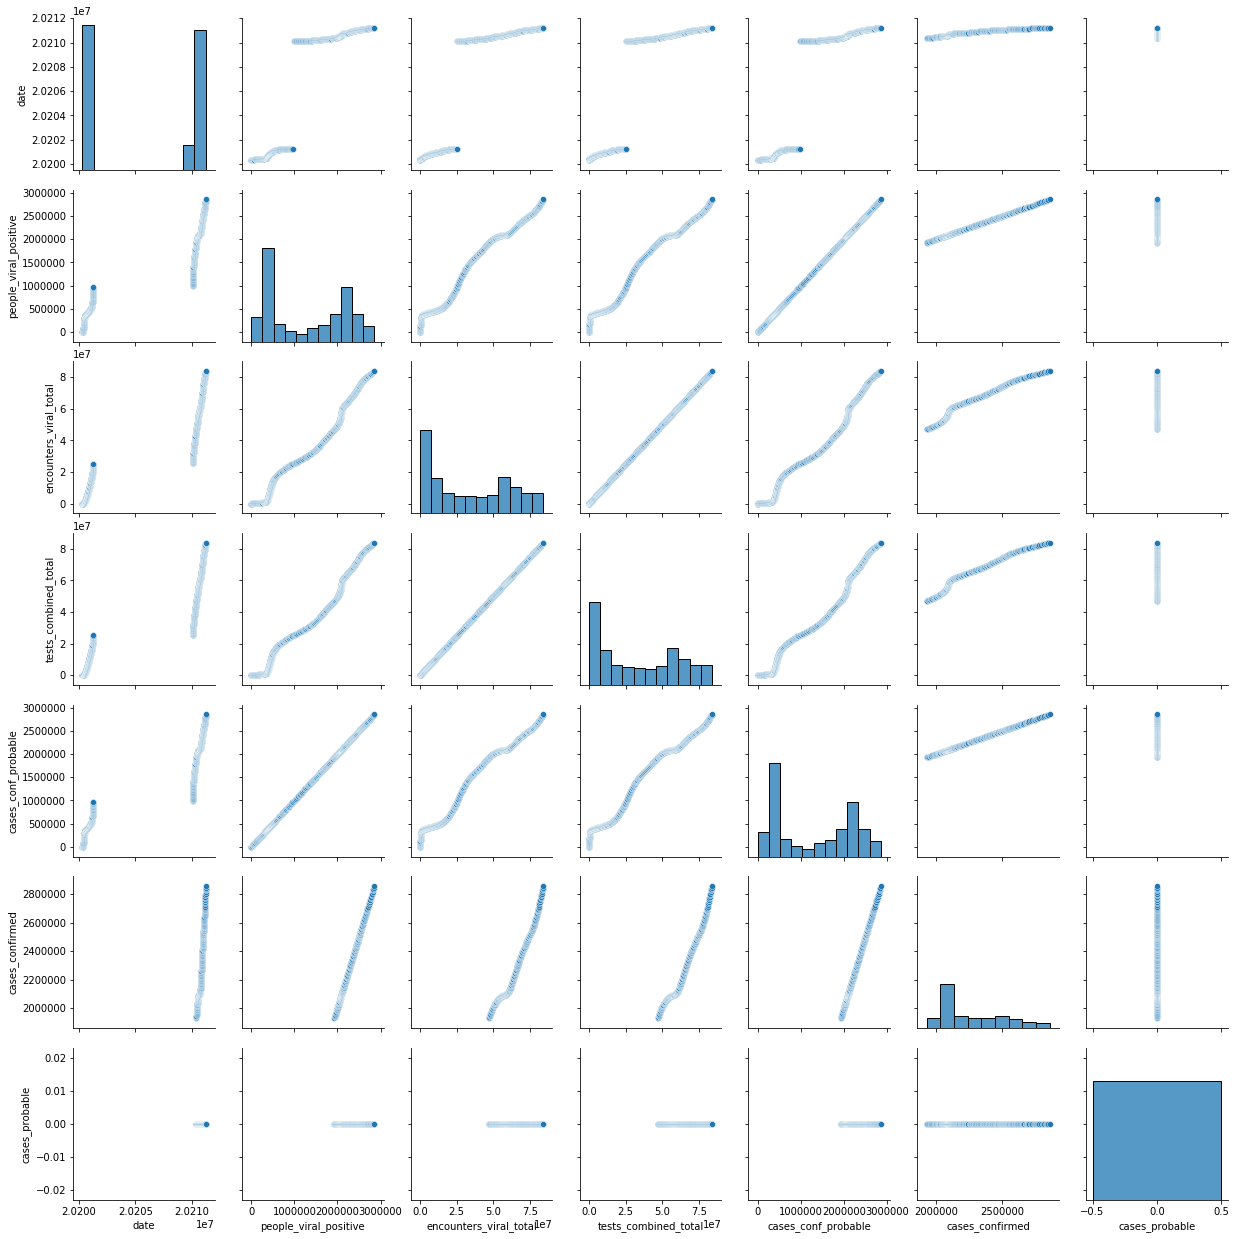

In [20]:
ny_df.drop(columns=['tests_viral_positive', 'tests_viral_negative', 'tests_viral_total', 'people_viral_total','people_antigen_positive','people_antigen_total'], inplace=True)
sns.pairplot(ny_df)

## 4. Analyze the New York data for the tests_combined_total Feature 
Find the average for the variable tests_combined_total for NY.


In [21]:
print('Average Total Combined Tests for New York',round(ny_df["tests_combined_total"].mean(),2))
print('Median Total Combined Tests for New York ',round(ny_df["tests_combined_total"].median(),2))

Average Total Combined Tests for New York 33822544.06
Median Total Combined Tests for New York  30162004.0


## 5. Visualize New York Data 
Create a visualization of the tests_combined_total variable for NY. Can be a static chart. 

<b>Histogram and Density Plots</b>

The distribution of data suggests there are 2 distinct clusters of data. The histogram and density plot shows a bimodal curve. 

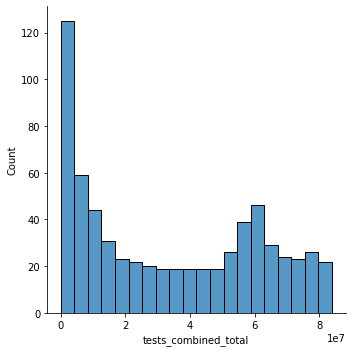

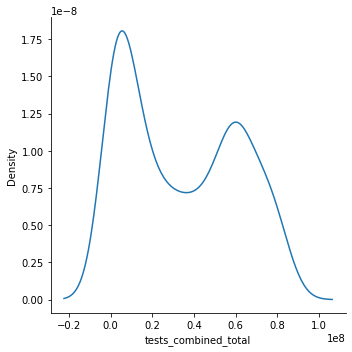

In [22]:
sns.displot(ny_df, x="tests_combined_total", bins=20)
sns.displot(ny_df, x="tests_combined_total", kind="kde")

<b>Box Plot</b>

A box plot shows the spread and skewness groups of numerical data through their quartiles. It may also show outliers plotted as individual dots outside of the whiskers. 

Majority of the data lies between 1,000,000 and 6,000,000 total combined tests. 

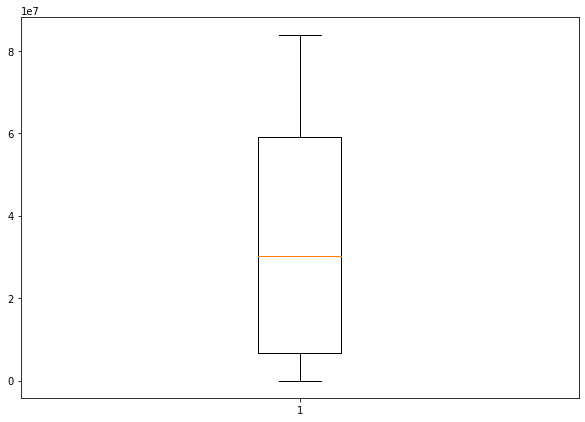

In [23]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(ny_df['tests_combined_total'])
plt.show()

## 6. Analysis Summary 
Write a short description of the data and analysis based on what you’ve done above. Describe your process/choices briefly, and specifically note any steps in your process that are not expressed in your code. Essentially, if you were to create a short wiki page/GitHub repository about this data/analysis/process, what would it say?

### Summary 
This analysis was completed using COVID testing data provided by Johns Hopkins University to analyze cumulative COVID testing counts in the state of New York. 

#### Load Data
The data was sourced from the Johns Hopkins coronavirus API and converted from a json format to a pandas dataframe. 

#### Data Exploration
The data contains 36,628 records and 14 features where 12 variables have a float data type, 1 has an int data type, and 1 contains string values. 3.9 MB are used for memory of this data.
Features:
•	date
•	state
•	people_viral_positive
•	tests_viral_positive
•	tests_viral_negative
•	encounters_viral_total
•	tests_viral_total
•	people_viral_total
•	tests_combined_total
•	cases_conf_probable
•	people_antigen_positive
•	people_antigen_total
•	cases_confirmed
•	cases_probable

The data has several columns that are missing values. The columns people_antigen_positive and people_antigen_total are missing 90%+ of values. The columns encounters_viral_total, tests_viral_negative, cases_probable, cases_confirmed, people_viral_total, and tests_viral_positive are missing between 50% and 75% of values. The remaining columns have less than 25% of values missing. Missing data can be problematic when applying machine learning models. Simpler algorithms cannot handle missing values. It's important to handle missing data effectively.

On average 4,318,515 tests are positive, 3,790,848 people test positive, and 3,823,510 tests are negative. There are strong positive correlations with majority of the individual variables. The correlation plot suggests there is multicollinearity. Multicollinearity among independent variables will result in less reliable statistical inferences. The existence of multicollinearity in a data set can lead to less reliable results due to larger standard errors. The variables tests_viral_total, tests_combined_total, and encounters_viral_total have many outliers and a wider spread of data.

The distribution of the tests_combined_total variable suggests the data is skewed to the right. When data is skewed right, the mean is larger than the median. The histogram and density plot display a pareto distribution and the mean is larger than the median. The average amount of total tests combined for the population equates to 5,424,406 tests. The median amount of total tests combined for the population equates to 1,845,335 tests.

#### Data Preparation and New York Exploration
The data contains 654 records and 14 features. A considerably smaller amount of memory is being used for the New York Data. 76.6 KB are allocated for memory of this data. The variables tests_viral_positive, tests_viral_negative, tests_viral_total, people_viral_total, people_antigen_positive, and people_antigen_total are missing 100% of values. 

On average 2,275,027 cases were confirmed and 1,292,877 were confirmed probable. On average a total of 3,382,254 viral encounters occurred in New York.

#### New York Average tests_combined_total
The average amount of total tests combined for New York equates to 33,822,544 tests. The median amount of total tests combined for New York equates to 30,162,004 tests. Now let’s compare that to the population. The average amount of total tests combined for the population equates to 5,424,406 tests. The median amount of total tests combined for the population equates to 1,845,335 tests. New York well surpasses the population in the amount of testing. 

#### New York tests_combined_total Visualized
Analyzing the distribution of the tests_combined_total variable further for the state of New York shows there are 2 distinct clusters of data. The histogram and density plot displays a bimodal curve. The box plot shows that the majority of the total combined tests variable lies between 1,000,000 and 6,000,000 total combined tests. 
